## K-Means

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline

## Load Heart Dataset

In [73]:
url = "lib/heart.csv"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url)

## Normalizando os dados

In [74]:
features = df.columns[:-1] ## Retirada do Resultado
                     
x = df.loc[:, features].values

In [75]:
y = df.loc[:,['target']].values ## Apenas os Resultados, Não Usados no K-Means

In [76]:
X = StandardScaler().fit_transform(x) ## Valores Normalizados

In [56]:
pd.DataFrame(data = X, columns = features).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


## PCA Projection to 2D

In [57]:
## Realização de PCA para encontrar as principais características e plotar o gráfico

pca = PCA(n_components=2)

In [58]:
principalComponents = pca.fit_transform(X)

In [60]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [61]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.624111,2.321270
1,-0.455988,-0.957351
2,-1.828805,0.042885
3,-1.716006,-0.495337
4,-0.371356,0.301156


In [62]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,0.624111,2.321270,1
1,-0.455988,-0.957351,1
2,-1.828805,0.042885,1
3,-1.716006,-0.495337,1
4,-0.371356,0.301156,1


In [63]:
a = list(finalDf['principal component 1'])
b = list(finalDf['principal component 2'])
c = np.array(map(lambda x,y:np.array([x,y]),a,b))

X=np.array([(a[i],b[i]) for i in range(0,len(a))])


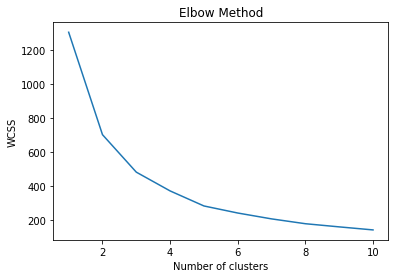

In [64]:
### Método do Elbow para encontrar a quantidade de clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=5)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

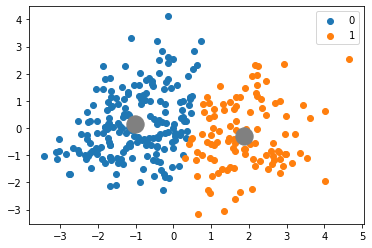

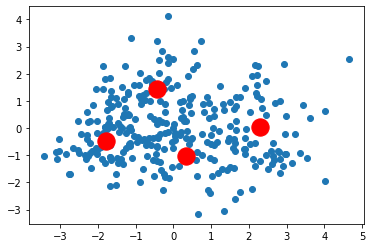

In [40]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()